In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/YoloVQA

/content/gdrive/MyDrive/YoloVQA


In [ ]:
#!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (520/520), done.
Updating files: 100% (108/108), done.


In [2]:
%cd /content/gdrive/MyDrive/YoloVQA/yolov7

/content/gdrive/MyDrive/YoloVQA/yolov7


In [3]:
!pip install -r requirements.txt

In [ ]:
#!unzip /content/gdrive/MyDrive/YoloVQA/Geometric_Shape_Recognition.v1i.yolov7pytorch.zip -d //content/gdrive/MyDrive/YoloVQA/data

Archive:  /content/gdrive/MyDrive/YoloVQA/Geometric_Shape_Recognition.v1i.yolov7pytorch.zip
  inflating: //content/gdrive/MyDrive/YoloVQA/data/README.dataset.txt  
  inflating: //content/gdrive/MyDrive/YoloVQA/data/README.roboflow.txt  
  inflating: //content/gdrive/MyDrive/YoloVQA/data/data.yaml  
   creating: //content/gdrive/MyDrive/YoloVQA/data/test/
   creating: //content/gdrive/MyDrive/YoloVQA/data/test/images/
 extracting: //content/gdrive/MyDrive/YoloVQA/data/test/images/1645884691_45-kartinkin-net-p-krug-kartinki-46_png_jpg.rf.19199931b077fbfc84de0d1f9d76a01e.jpg  
 extracting: //content/gdrive/MyDrive/YoloVQA/data/test/images/2D-shape-_-pelmanism-game-202218_jpg.rf.235443543be5ace0d3334b1e5570efec.jpg  
 extracting: //content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg  
 extracting: //content/gdrive/MyDrive/YoloVQA/data/test/images/AdobeStock_622930524_Preview_png.rf.6e4e2bd231f61a7ccd16825b9d95

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
train_data_dir = "/content/gdrive/MyDrive/YoloVQA/data/train"
test_data_dir = "/content/gdrive/MyDrive/YoloVQA/data/test" #@param {type:"string"}
val_data_dir = "/content/gdrive/MyDrive/YoloVQA/data/valid"#@param {type:"string"}

class_names = ['Circle','Ellipse','Hexagon','Pentagon','Quatrefoil','Rectangle','Rhombus','Square','Star','Triangle'] #@param {type:"raw"}
with open('data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: 10
        names: {class_names}
        """
    )

In [ ]:
number_of_classes = 10 #@param {type:"integer"}
with open('train_yaml', 'w+') as file:
    file.write(
         f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.75  # model depth multiple
        width_multiple: 0.75  # layer channel multiple

        # anchors
        anchors:
          - [12,16, 19,36, 40,28]  # P3/8
          - [36,75, 76,55, 72,146]  # P4/16
          - [142,110, 192,243, 459,401]  # P5/32

        # yolov7 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Conv, [32, 3, 1]],  # 0

          [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2
          [-1, 1, Conv, [64, 3, 1]],

          [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4
          [-1, 1, Conv, [64, 1, 1]],
          [-2, 1, Conv, [64, 1, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [[-1, -3, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [256, 1, 1]],  # 11

          [-1, 1, MP, []],
          [-1, 1, Conv, [128, 1, 1]],
          [-3, 1, Conv, [128, 1, 1]],
          [-1, 1, Conv, [128, 3, 2]],
          [[-1, -3], 1, Concat, [1]],  # 16-P3/8
          [-1, 1, Conv, [128, 1, 1]],
          [-2, 1, Conv, [128, 1, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [[-1, -3, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [512, 1, 1]],  # 24

          [-1, 1, MP, []],
          [-1, 1, Conv, [256, 1, 1]],
          [-3, 1, Conv, [256, 1, 1]],
          [-1, 1, Conv, [256, 3, 2]],
          [[-1, -3], 1, Concat, [1]],  # 29-P4/16
          [-1, 1, Conv, [256, 1, 1]],
          [-2, 1, Conv, [256, 1, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [[-1, -3, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [1024, 1, 1]],  # 37

          [-1, 1, MP, []],
          [-1, 1, Conv, [512, 1, 1]],
          [-3, 1, Conv, [512, 1, 1]],
          [-1, 1, Conv, [512, 3, 2]],
          [[-1, -3], 1, Concat, [1]],  # 42-P5/32
          [-1, 1, Conv, [256, 1, 1]],
          [-2, 1, Conv, [256, 1, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [[-1, -3, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [1024, 1, 1]],  # 50
          [-1, 1, SPPCSPC, [512]],  #add sppcsp
          ]

        # yolov7 head
        head:
          [[-1, 1, SPPCSPC, [512]], # 51

          [-1, 1, Conv, [256, 1, 1]],
          [-1, 1, nn.Upsample, [None, 2, 'nearest']],
          [37, 1, Conv, [256, 1, 1]], # route backbone P4
          [[-1, -2], 1, Concat, [1]],

          [-1, 1, Conv, [256, 1, 1]],
          [-2, 1, Conv, [256, 1, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [256, 1, 1]], # 63

          [-1, 1, Conv, [128, 1, 1]],
          [-1, 1, nn.Upsample, [None, 2, 'nearest']],
          [24, 1, Conv, [128, 1, 1]], # route backbone P3
          [[-1, -2], 1, Concat, [1]],

          [-1, 1, Conv, [128, 1, 1]],
          [-2, 1, Conv, [128, 1, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [-1, 1, Conv, [64, 3, 1]],
          [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [128, 1, 1]], # 75

          [-1, 1, MP, []],
          [-1, 1, Conv, [128, 1, 1]],
          [-3, 1, Conv, [128, 1, 1]],
          [-1, 1, Conv, [128, 3, 2]],
          [[-1, -3, 63], 1, Concat, [1]],

          [-1, 1, Conv, [256, 1, 1]],
          [-2, 1, Conv, [256, 1, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [-1, 1, Conv, [128, 3, 1]],
          [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [256, 1, 1]], # 88

          [-1, 1, MP, []],
          [-1, 1, Conv, [256, 1, 1]],
          [-3, 1, Conv, [256, 1, 1]],
          [-1, 1, Conv, [256, 3, 2]],
          [[-1, -3, 51], 1, Concat, [1]],

          [-1, 1, Conv, [512, 1, 1]],
          [-2, 1, Conv, [512, 1, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [-1, 1, Conv, [256, 3, 1]],
          [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
          [-1, 1, Conv, [512, 1, 1]], # 101

          [75, 1, RepConv, [256, 3, 1]],
          [88, 1, RepConv, [512, 3, 1]],
          [101, 1, RepConv, [1024, 3, 1]],

          [[102,103,104], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
          ]
        """
)

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
#start train
start = datetime.now()
!python train.py  --img 640 --batch 16  --epochs 100 --data /content/gdrive/MyDrive/YoloVQA/yolov7/data_yaml --cfg /content/gdrive/MyDrive/YoloVQA/yolov7/train_yaml --weights ""
end = datetime.now()
print('Trainine time:', end - start)

2024-11-21 02:40:48.764206: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-21 02:40:48.781834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 02:40:48.803060: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 02:40:48.809720: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 02:40:48.825307: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python test.py --weights /content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp5/weights/best.pt --data data_yaml --task test

Namespace(weights=['/content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp5/weights/best.pt'], data='data_yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.1+cu121 CUDA:0 (NVIDIA L4, 22699.875MB)

/content/gdrive/MyDrive/YoloVQA/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions t

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp5/weights/best.pt --source /content/gdrive/MyDrive/YoloVQA/data/train/images/-25-_png_jpg.rf.ddf195298c42457435e65b2846291572.jpg

Namespace(weights=['/content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp5/weights/best.pt'], source='/content/gdrive/MyDrive/YoloVQA/data/train/images/-25-_png_jpg.rf.ddf195298c42457435e65b2846291572.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.1+cu121 CUDA:0 (NVIDIA L4, 22699.875MB)

/content/gdrive/MyDrive/YoloVQA/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_

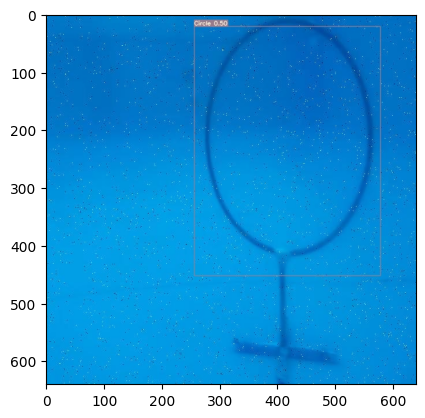

In [ ]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline
image = Image.open('/content/gdrive/MyDrive/YoloVQA/yolov7/runs/detect/exp2/-25-_png_jpg.rf.ddf195298c42457435e65b2846291572.jpg')
plt.imshow(image)


In [4]:
import yaml

yaml_file_path = "/content/gdrive/MyDrive/YoloVQA/yolov7/cfg/training/yolov7.yaml"
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)

print("YAML 文件内容:")
print(yaml_content)

YAML 文件内容:
{'nc': 10, 'depth_multiple': 1.0, 'width_multiple': 1.0, 'anchors': [[12, 16, 19, 36, 40, 28], [36, 75, 76, 55, 72, 146], [142, 110, 192, 243, 459, 401]], 'backbone': [[-1, 1, 'Conv', [32, 3, 1]], [-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 1, 'Conv', [64, 1, 1]], [-2, 1, 'Conv', [64, 1, 1]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [64, 3, 1]], [[-1, -3, -5, -6], 1, 'Concat', [1]], [-1, 1, 'Conv', [256, 1, 1]], [-1, 1, 'MP', []], [-1, 1, 'Conv', [128, 1, 1]], [-3, 1, 'Conv', [128, 1, 1]], [-1, 1, 'Conv', [128, 3, 2]], [[-1, -3], 1, 'Concat', [1]], [-1, 1, 'Conv', [128, 1, 1]], [-2, 1, 'Conv', [128, 1, 1]], [-1, 1, 'Conv', [128, 3, 1]], [-1, 1, 'Conv', [128, 3, 1]], [-1, 1, 'Conv', [128, 3, 1]], [-1, 1, 'Conv', [128, 3, 1]], [[-1, -3, -5, -6], 1, 'Concat', [1]], [-1, 1, 'Conv', [512, 1, 1]], [-1, 1, 'MP', []], [-1, 1, 'Conv', [256, 1, 1]], [-3, 1, 'Conv', [256, 1, 1

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt
start = datetime.now()
!python train.py  --img 640 --batch 16  --epochs 250 --data /content/gdrive/MyDrive/YoloVQA/yolov7/data_yaml --cfg /content/gdrive/MyDrive/YoloVQA/yolov7/cfg/training/yolov7.yaml --weights ""
end = datetime.now()
print('Trainine time:', end - start)

2024-11-28 23:39:24.651548: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-28 23:39:24.668881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 23:39:24.689846: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 23:39:24.696252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 23:39:24.711382: I tensorflow/core/platform/cpu_feature_guar

In [9]:
!python detect.py --weights /content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp21/weights/best.pt --source /content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg

Namespace(weights=['/content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp21/weights/best.pt'], source='/content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.1+cu121 CUDA:0 (NVIDIA L4, 22699.875MB)

/content/gdrive/MyDrive/YoloVQA/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release,

In [12]:
!python detect.py --weights /content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp21-yolov7x/weights/best.pt --source /content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg

Namespace(weights=['/content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp21-yolov7x/weights/best.pt'], source='/content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.1+cu121 CUDA:0 (NVIDIA L4, 22699.875MB)

/content/gdrive/MyDrive/YoloVQA/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future 

In [11]:
!python detect.py --weights /content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp7-cunstomBig/weights/best.pt --source /content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg

Namespace(weights=['/content/gdrive/MyDrive/YoloVQA/yolov7/runs/train/exp7-cunstomBig/weights/best.pt'], source='/content/gdrive/MyDrive/YoloVQA/data/test/images/73e56a8c-a43c-48ae-9437-ba7e5bed912c_png_jpg.rf.8e46cb1075efd1e5255fccf4b03e2327.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.1+cu121 CUDA:0 (NVIDIA L4, 22699.875MB)

/content/gdrive/MyDrive/YoloVQA/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a futur